<a href="https://colab.research.google.com/github/Sedighe-Raeisi/NLP-Sentiment-Analysis-/blob/main/2_Tweet_Sentiment_Prertrained_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [ ]:
neg=len(df[df['sentiment']=='negative'])
pos=len(df[df['sentiment']=='positive'])

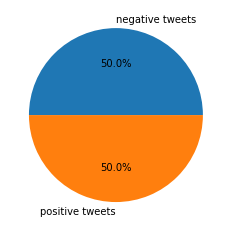

In [ ]:
plt.pie([neg,pos],labels=['negative tweets','positive tweets'], autopct='%2.1f%%');

#Importing data from link:
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
!pip install kaggle

In [ ]:
!mkdir  -p /root/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/kaggle.json -r /root/.kaggle/

In [ ]:
!chmod 600 ~ /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 96% 78.0M/80.9M [00:00<00:00, 151MB/s]
100% 80.9M/80.9M [00:00<00:00, 149MB/s]


In [ ]:
!cp /content/sentiment140.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!unzip /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip -d /content/drive/MyDrive/MachineLearning/NLP

Archive:  /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip
  inflating: /content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv  


##Preparing the dataframe

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
data=pd.read_csv(path
               ,encoding='latin-1'
               )

In [ ]:
data.columns

Index(['Unnamed: 0', 'sentiment', 'tweet', 'clean'], dtype='object')

In [ ]:
set(data['0'])

In [ ]:
df=pd.DataFrame()

In [ ]:
def sentiment(x):
  if x==4:
    return 'positive'
  elif x==0:
    return 'negative'

In [ ]:
df['sentiment']=data['0'].apply(lambda x: sentiment(x) )

In [ ]:
df['tweet']=data.iloc[:,5]

In [ ]:
del data

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
(set(df['sentiment']))

#Preprocessing:


##Preprocessing Tweets:

In [ ]:
df.head()

,sentiment,tweet
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  sentence=sentence.replace('{@}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['clean']=df['tweet'].apply(lambda x: preprocess(x))

In [ ]:
df.to_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [ ]:
df.dropna(inplace=True)


##Preprocessing labels

In [3]:
df.dropna(inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder 

In [5]:
le=LabelEncoder()

In [6]:
y=le.fit_transform(df['sentiment'])

In [7]:
y

array([0, 0, 0, ..., 1, 1, 1])

# Word Embedding:

##We make our dictionary:

In [8]:
from keras.preprocessing.text import Tokenizer

In [9]:
vocabulary_size = 200000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['clean'])

##x:

In [10]:
from keras.preprocessing.sequence import  pad_sequences

In [11]:
sequences = tokenizer.texts_to_sequences(df['clean'])
data = pad_sequences(sequences, maxlen=50)
x=data


##Prepairing the embedding with pretrained Glove:


###Importing Pretrained Glove:

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# !cp /content/glove.6B.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/NLP/glove.6B.zip -r /content/

In [ ]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embeddings_index = dict()
f = open('/content/glove.6B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#### Creating Embedding Matrix:

In [ ]:
embedding_matrix = np.zeros((vocabulary_size, 200))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

##Train Test Split:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=47, stratify=y, test_size=.2)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1279324, 50) (319831, 50) (1279324,) (319831,)


#Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, Dense

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 200, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_glove.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 200)           40000000  
                                                                 
 dropout_2 (Dropout)         (None, 50, 200)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 64)            64064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                      

In [ ]:
hist=model_glove.fit(x_train, y_train, epochs=3, validation_split=.2, batch_size=625)

Epoch 1/3
1638/1638 [==============================] - 547s 332ms/step - loss: 0.6041 - accuracy: 0.6608 - val_loss: 0.5844 - val_accuracy: 0.6793
Epoch 2/3
1638/1638 [==============================] - 580s 354ms/step - loss: 0.5862 - accuracy: 0.6776 - val_loss: 0.5814 - val_accuracy: 0.6820
Epoch 3/3
1638/1638 [==============================] - 562s 343ms/step - loss: 0.5797 - accuracy: 0.6831 - val_loss: 0.5789 - val_accuracy: 0.6845


In [ ]:
model_glove.save('/content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2/assets


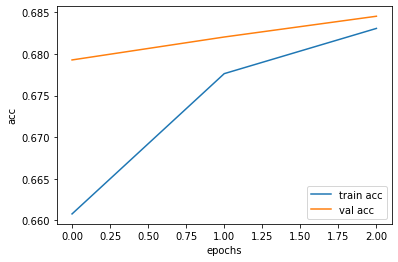

In [ ]:
plt.plot(hist.history['accuracy'],label='train acc')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show();

Fit the model for more 5 epochs

In [ ]:
hist2=model_glove.fit(x_train, y_train, epochs=5, validation_split=.2, batch_size=625)

Epoch 1/5
1638/1638 [==============================] - 568s 346ms/step - loss: 0.5759 - accuracy: 0.6862 - val_loss: 0.5778 - val_accuracy: 0.6857
Epoch 2/5
1638/1638 [==============================] - 704s 430ms/step - loss: 0.5731 - accuracy: 0.6882 - val_loss: 0.5747 - val_accuracy: 0.6877
Epoch 3/5
1638/1638 [==============================] - 559s 341ms/step - loss: 0.5706 - accuracy: 0.6902 - val_loss: 0.5749 - val_accuracy: 0.6872
Epoch 4/5
1638/1638 [==============================] - 579s 353ms/step - loss: 0.5685 - accuracy: 0.6917 - val_loss: 0.5742 - val_accuracy: 0.6890
Epoch 5/5
1638/1638 [==============================] - 548s 334ms/step - loss: 0.5669 - accuracy: 0.6929 - val_loss: 0.5747 - val_accuracy: 0.6884


##Score:

In [13]:
from keras.models import load_model

In [12]:
Glove1_path='/content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2'


In [14]:
model_glove=load_model(Glove1_path)

In [19]:
pred=model_glove.predict(x_test)


In [20]:
pred=pred.reshape(pred.shape[0])

In [21]:
def step(x):
  if x>.5:
    return 1
  elif x<.5:
    return 0

In [22]:
y_pred=list(map(step, pred))


In [23]:
set(y_pred)

{0, 1}

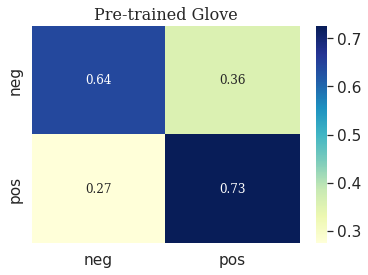

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, normalize='true')

ax = plt.axes()
font={"size": 16, "family":'serif'}
ax.set_title('Pre-trained Glove',fontdict=font)

sn.set(font_scale=1.4)
ax=sn.heatmap(cm, annot=True, fmt='2.2f',
            yticklabels=[ 'neg','pos'] ,
           xticklabels=[ 'neg','pos'] ,
           cmap='YlGnBu',ax=ax
           ,annot_kws={"size": 12, "family":'serif'}, 
           );

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.6838611641773311

##Model_2

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
model = Sequential()

model.add(Embedding(vocabulary_size, 200, input_length=50, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 100, activation='relu',use_bias=True))
model.add(Dense(units=1000, input_dim = 2000, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=500, input_dim=1000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, input_dim=500,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 200)           40000000  
                                                                 
 dropout_3 (Dropout)         (None, 50, 200)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 1000)              101000    
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)              

In [ ]:
hist_2=model.fit(x_train, y_train, epochs=3, validation_split=.2, batch_size=625)

Epoch 1/3
1638/1638 [==============================] - 599s 365ms/step - loss: 0.5407 - accuracy: 0.7238 - val_loss: 0.4944 - val_accuracy: 0.7578
Epoch 2/3
1638/1638 [==============================] - 620s 379ms/step - loss: 0.5023 - accuracy: 0.7529 - val_loss: 0.4872 - val_accuracy: 0.7638
Epoch 3/3
1638/1638 [==============================] - 505s 308ms/step - loss: 0.4929 - accuracy: 0.7595 - val_loss: 0.4778 - val_accuracy: 0.7695


In [ ]:
hist_2_2=model.fit(x_train, y_train, epochs=4, validation_split=.2, batch_size=625)

Epoch 1/4
1638/1638 [==============================] - 468s 286ms/step - loss: 0.4871 - accuracy: 0.7634 - val_loss: 0.4742 - val_accuracy: 0.7718
Epoch 2/4
1638/1638 [==============================] - 469s 287ms/step - loss: 0.4832 - accuracy: 0.7661 - val_loss: 0.4728 - val_accuracy: 0.7732
Epoch 3/4
1638/1638 [==============================] - 441s 269ms/step - loss: 0.4804 - accuracy: 0.7678 - val_loss: 0.4701 - val_accuracy: 0.7738
Epoch 4/4
1638/1638 [==============================] - 496s 303ms/step - loss: 0.4782 - accuracy: 0.7692 - val_loss: 0.4684 - val_accuracy: 0.7752


###Visualization of model performance :

In [ ]:
train_acc=[]
train_acc+=hist_2.history['accuracy']
train_acc+=hist_2_2.history['accuracy']

In [ ]:
val_acc=[]
val_acc+=hist_2.history['val_accuracy']
val_acc+=hist_2_2.history['val_accuracy']

In [ ]:
val_acc

[0.7577589750289917,
 0.7637582421302795,
 0.7694799900054932,
 0.7718445062637329,
 0.773196816444397,
 0.7738181948661804,
 0.7751783132553101]

In [ ]:
train_acc

[0.7238472700119019,
 0.7529348731040955,
 0.7594910860061646,
 0.7633710503578186,
 0.7660609483718872,
 0.7678050398826599,
 0.7691788077354431]

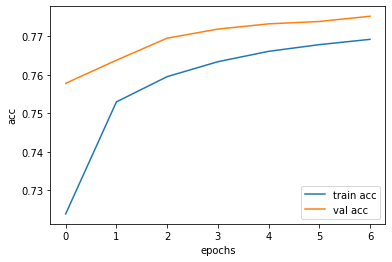

In [ ]:
plt.plot(train_acc,label='train acc')
plt.plot(val_acc,label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show();

In [ ]:
train_loss=[]
train_loss+=hist_2.history['loss']
train_loss+=hist_2_2.history['loss']

In [ ]:
val_loss=[]
val_loss+=hist_2.history['val_loss']
val_loss+=hist_2_2.history['val_loss']

In [ ]:
val_loss

[0.4944491684436798,
 0.4872499704360962,
 0.4777746796607971,
 0.47418418526649475,
 0.4728403091430664,
 0.47010537981987,
 0.4683606028556824]

In [ ]:
train_loss

[0.5407240986824036,
 0.5022514462471008,
 0.49292197823524475,
 0.4870526194572449,
 0.48318490386009216,
 0.4803876280784607,
 0.478175550699234]

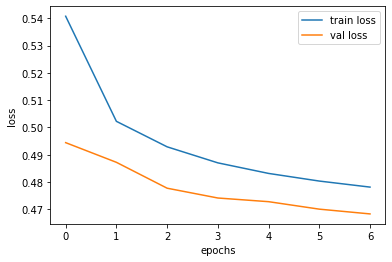

In [ ]:
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show();

In [ ]:
model.save('/content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2_2/assets


In [27]:
model_2=load_model('/content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_2_2')

#Score:

In [33]:
pred=model_2.predict(x_test)


In [34]:
pred=pred.reshape(pred.shape[0])

In [35]:
def step(x):
  if x>.5:
    return 1
  elif x<.5:
    return 0

In [36]:
y_pred=list(map(step, pred))


In [30]:
set(y_pred)

{0, 1}

In [ ]:
le.inverse_transform(np.array([0]))

array(['negative'], dtype=object)

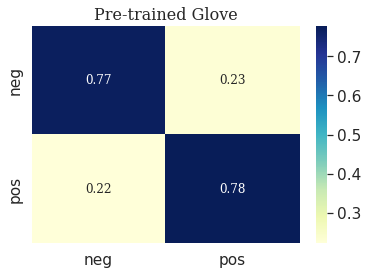

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, normalize='true')

ax = plt.axes()
font={"size": 16, "family":'serif'}
ax.set_title('Pre-trained Glove',fontdict=font)

sn.set(font_scale=1.4)
ax=sn.heatmap(cm, annot=True, fmt='2.2f',
            yticklabels=[ 'neg','pos'] ,
           xticklabels=[ 'neg','pos'] ,
           cmap='YlGnBu',ax=ax
           ,annot_kws={"size": 12, "family":'serif'}, 
           );

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7737398813748511